In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [5]:
airlines_data = pd.read_excel("EastWestAirlines.xlsx",1)
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
airlines_data.shape

(3999, 12)

In [8]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(airlines_data)
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# KMeans clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
ssc = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=2)
    km.fit(scaled_data)
    ssc.append(km.inertia_)

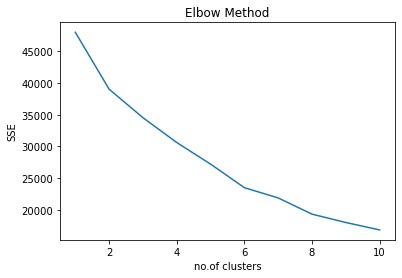

In [12]:
plt.plot(range(1,11),ssc)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('SSE')
plt.show()

In [13]:
cluster_kmean = KMeans(n_clusters=4)

In [14]:
cluster_kmean.fit(scaled_data)

KMeans(n_clusters=4)

In [15]:
cluster_kmean.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [16]:
cluster_kmean = cluster_kmean.labels_

In [17]:
airlines_data1 = airlines_data

In [18]:
airlines_data1['cluster']=cluster_kmean
airlines_data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [19]:
airlines_data1['cluster'].unique()

array([3, 2, 1, 0])

In [20]:
airlines_data1[airlines_data1['cluster']==0],airlines_data1[airlines_data1['cluster']==0].shape

(       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 1129  1141     1625           0          1          1          1         1375   
 1424  1438    22093           0          3          1          1        14857   
 1950  1967    15676           0          1          1          1            0   
 1951  1968    55064           0          2          1          1         8041   
 1952  1969    40675           0          1          1          1         1413   
 ...    ...      ...         ...        ...        ...        ...          ...   
 3994  4017    18476           0          1          1          1         8525   
 3995  4018    64385           0          1          1          1          981   
 3996  4019    73597           0          3          1          1        25447   
 3997  4020    54899           0          1          1          1          500   
 3998  4021     3016           0          1          1          1            0   
 
       Bonus_t

In [21]:
airlines_data1[airlines_data1['cluster']==2],airlines_data1[airlines_data1['cluster']==2].shape

(       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 4        5    97752           0          4          1          1        43300   
 6        7    84914           0          3          1          1        27482   
 9       10   104860           0          3          1          1        28426   
 11      12    96522           0          5          1          1        61105   
 15      16    28495           0          4          1          1        49442   
 ...    ...      ...         ...        ...        ...        ...          ...   
 3867  3890    88404           0          4          1          1        37304   
 3881  3904    32424           0          4          1          1        39635   
 3883  3906   126167           0          5          1          1       190160   
 3908  3931    57642           0          4          1          1        52176   
 3930  3953    40424           0          4          1          1        44110   
 
       Bonus_t

In [22]:
airlines_data1[airlines_data1['cluster']==3],airlines_data1[airlines_data1['cluster']==3].shape

(       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0        1    28143           0          1          1          1          174   
 1        2    19244           0          1          1          1          215   
 2        3    41354           0          1          1          1         4123   
 3        4    14776           0          1          1          1          500   
 5        6    16420           0          1          1          1            0   
 ...    ...      ...         ...        ...        ...        ...          ...   
 2168  2185   245045           0          1          1          1        25039   
 2176  2193   194875           0          1          1          1         7550   
 2184  2201   109268           0          2          1          1         7401   
 2194  2211    81251           0          1          1          1        19500   
 2202  2219    35445           0          1          1          1         3379   
 
       Bonus_t

In [23]:
airlines_data1[airlines_data1['cluster']==1],airlines_data1[airlines_data1['cluster']==1].shape

(       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 8        9   443003           0          3          2          1         1753   
 42      43    60313           0          1          1          1        10000   
 65      66    53914           0          3          1          1        33767   
 94      97   185549           0          5          1          1       110859   
 112    115   124198           0          5          1          1        66330   
 ...    ...      ...         ...        ...        ...        ...          ...   
 3907  3930   126490           0          1          1          1         8808   
 3911  3934    55922        2273          1          1          1         8104   
 3917  3940   130748           0          4          1          1        65510   
 3934  3957    76595           0          1          1          1        10577   
 3950  3973    59650           0          1          1          1         5050   
 
       Bonus_t

# Hierarchical clustering

In [24]:
x = airlines_data.iloc[:,1:]

In [25]:
from sklearn.preprocessing import StandardScaler
airline_data_std=StandardScaler().fit_transform(x)

In [26]:
airline_data_scaled=pd.DataFrame(airline_data_std,columns=x.columns)
airline_data_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1.149653
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1.149653
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1.149653
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1.149653
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0.376450
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,-1.169954
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,-1.169954
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-1.169954
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,-1.169954


In [27]:
import scipy.cluster.hierarchy as sch

In [28]:
#dendogram=sch.dendrogram(sch.linkage(airline_data_scaled,method='single', metric='euclidean'))

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc=AgglomerativeClustering(n_clusters=2,linkage='single')
y_hc=hc.fit_predict(airline_data_scaled)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
cluster_ag=pd.DataFrame({'cluster':y_hc})
cluster_ag

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [32]:
airline_data_2 = airlines_data
airline_data_2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
airline_data_2['cluster']=cluster_ag
airline_data_2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [34]:
airline_data_2['cluster'].unique()

array([0, 1], dtype=int64)

In [35]:
airline_data_2[airline_data_2['cluster']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [36]:
airline_data_2[airline_data_2['cluster']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1


# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
cluster_dbscan=DBSCAN(eps=0.7,min_samples=3)

In [39]:
cluster_dbscan.fit(airline_data_std)

DBSCAN(eps=0.7, min_samples=3)

In [40]:
cluster=cluster_dbscan.labels_

In [41]:
cluster

array([ 0,  0,  0, ..., 30, 18, 18], dtype=int64)

In [42]:
airline_data_3 = airlines_data

In [43]:
airline_data_3['cluster']=cluster

In [44]:
airline_data_2['cluster'].unique()

array([ 0, 12, -1,  1,  2,  3,  4,  5,  8,  6,  7,  9, 10, 11, 13, 17, 19,
       16, 14, 15, 18, 20, 22, 21, 23, 28, 24, 25, 26, 27, 31, 29, 30, 32,
       38, 33, 34, 35, 36, 37], dtype=int64)

In [45]:
airline_data_3.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901,0.638128
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,-0.238980
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,-0.163244
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,-0.157118
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,-0.021590
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.060949
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,-0.231496
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,-0.235799
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,-0.217279
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,-0.227645


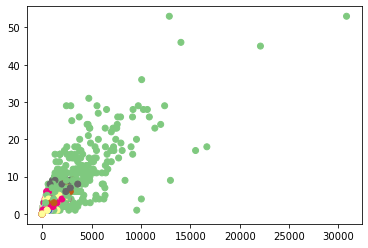

In [46]:
plt.scatter(airline_data_3['Flight_miles_12mo'],airline_data_3['Flight_trans_12'],c=cluster,cmap=plt.cm.Accent)